In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

def read_csv_loss_history(filename):
    """Read loss history from CSV file
    
    Returns array with epochs and array with corresponding losses

    :arg filename: name of csv file to read
    """
    data = pd.read_csv(filename)
    steps = data["Step"].to_numpy()
    loss = data["Value"].to_numpy()
    return steps, loss

## Plot loss histories of the Kepler- and Schwarzschild problems

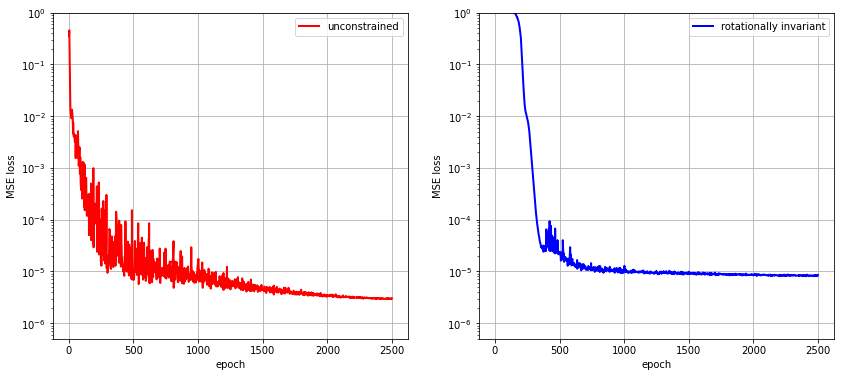

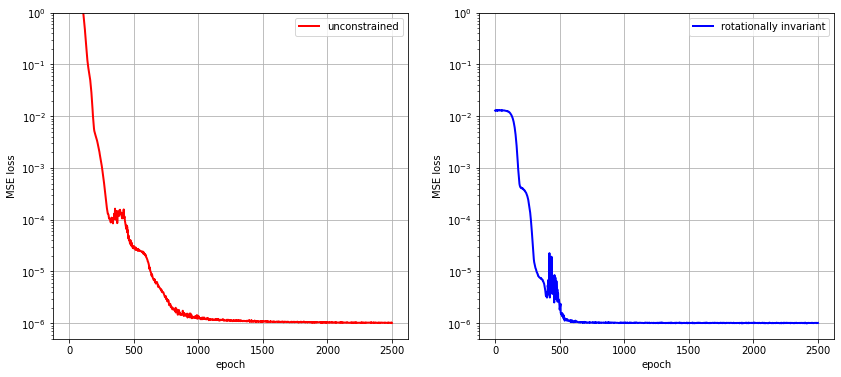

In [6]:
for problem in ["kepler","schwarzschild"]:
    dir = os.path.join("../assets/loss_histories/",problem)
    filenames = {
        "unconstrained":"loss.csv",
        "rotationally invariant":"loss_rot.csv"
    }
    fig, axs = plt.subplots(1, 2,figsize=(14,6))

    # Unconstrained
    label = "unconstrained"
    filename = filenames[label]
    X, Y = read_csv_loss_history(os.path.join(dir,filename))
    axs[0].plot(X,Y,linewidth=2,color="red",label=label)

    # Rotationally invariant
    label = "rotationally invariant"
    filename = filenames[label]
    X, Y = read_csv_loss_history(os.path.join(dir,filename))
    axs[1].plot(X,Y,linewidth=2,color="blue",label=label)

    for ax in axs:
        ax.grid(True)
        ax.set_yscale("log")
        ax.set_ylim(0.5E-6,1.0)
        ax.legend(loc="upper right")
        ax.set_xlabel("epoch")
        ax.set_ylabel("MSE loss")
    plt.savefig(f"loss_history_{problem}.pdf",bbox_inches="tight")
    plt.show()

## Plot loss histories of the two-particle model

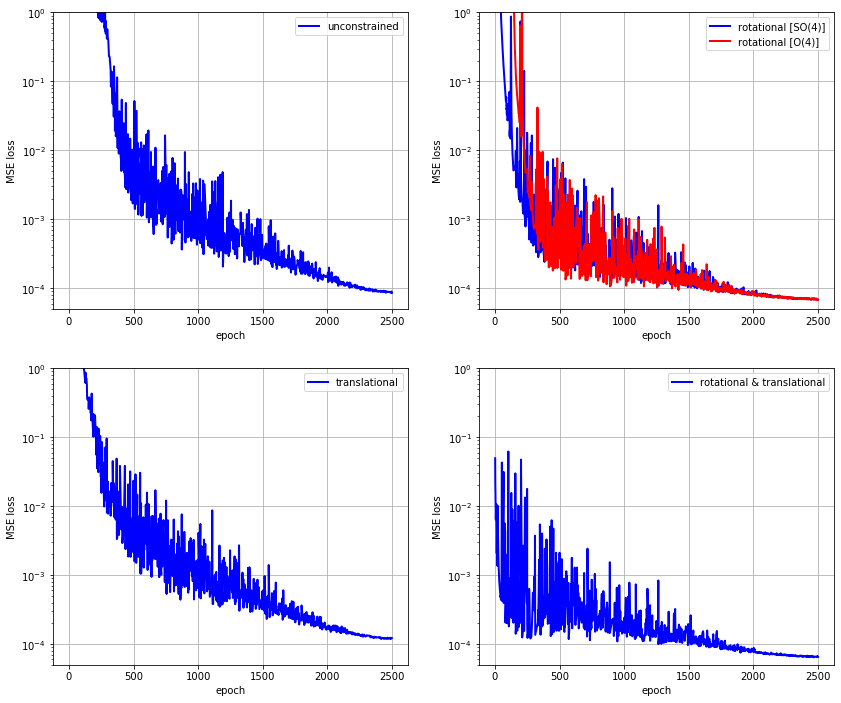

In [12]:
dir = "../assets/loss_histories/two_particle/4d"
filenames = {
    "unconstrained":"loss.csv",
    "rotational [SO(4)]":"loss_rot.csv",
    "rotational [O(4)]":"loss_rot_ref.csv",
    "translational":"loss_trans.csv",
    "rotational & translational":"loss_rot_trans.csv",
}
fig, axs = plt.subplots(2, 2,figsize=(14,12))

# Unconstrained
label = "unconstrained"
filename = filenames[label]
X, Y = read_csv_loss_history(os.path.join(dir,filename))
axs[0,0].plot(X,Y,linewidth=2,color="blue",label=label)

# Translational
label = "translational"
filename = filenames[label]
X, Y = read_csv_loss_history(os.path.join(dir,filename))
axs[1,0].plot(X,Y,linewidth=2,color="blue",label=label)

# Rotational
label = "rotational [SO(4)]"
filename = filenames[label]
X, Y = read_csv_loss_history(os.path.join(dir,filename))
axs[0,1].plot(X,Y,linewidth=2,color="blue",label=label)
label = "rotational [O(4)]"
filename = filenames[label]
X, Y = read_csv_loss_history(os.path.join(dir,filename))
axs[0,1].plot(X,Y,linewidth=2,color="red",label=label)

# Translational and rotational
label = "rotational & translational"
filename = filenames[label]
X, Y = read_csv_loss_history(os.path.join(dir,filename))
axs[1,1].plot(X,Y,linewidth=2,color="blue",label=label)

for _ax in axs:
    for ax in _ax:
        ax.grid(True)
        ax.set_yscale("log")
        ax.set_ylim(5.E-5,1.0)
        ax.legend(loc="upper right")
        ax.set_xlabel("epoch")
        ax.set_ylabel("MSE loss")
plt.savefig("loss_history_two_particle.pdf",bbox_inches="tight")